In [1]:
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Data Generation 

In [6]:
data_PATH = r'/content/drive/MyDrive/Datasets/data256/train'
label_PATH = r'/content/drive/MyDrive/Datasets/train.csv'

df_train = pd.read_csv(label_PATH)
df_train['label'] = df_train['label'].astype('str')

df_train.head()

,name,label
0,train_5235410406999412.png,0
1,train_9050265579485831.png,1
2,train_4778558969322365.png,1
3,train_97406946215391.png,0
4,train_3428454526298198.png,0


Text(0.5, 1.0, 'DATA')

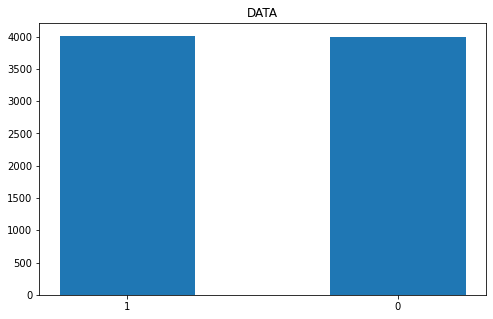

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
ax.bar(df_train.label.value_counts().index,df_train.label.value_counts().values,width=0.5)
ax.set_title('DATA')

In [8]:
x_train, x_val, y_train, y_val = train_test_split(df_train.drop(columns='label',axis=1),
                                               df_train['label'],
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=42)
df_train_cut = pd.concat([x_train,y_train],axis=1)
df_val_cut = pd.concat([x_val,y_val],axis=1)
print(x_train.shape, x_val.shape)

(6400, 1) (1600, 1)


In [9]:
def DataGeneration(Height, Width, BatchSize):
    start_time = time.time()
    training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rescale = 1./255,
                horizontal_flip = True,
                vertical_flip = True,
                brightness_range = [0.8,1.5],
                fill_mode = 'nearest')
    train_generator = training_datagen.flow_from_dataframe(
            dataframe = df_train_cut,
            directory = data_PATH,
            x_col = "name",
            y_col = "label",
            target_size = (Height, Width),
            batch_size = BatchSize,
            class_mode = 'binary',
            shuffle = True,
            seed = 42)

    validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rescale = 1./255)
    val_generator = validation_datagen.flow_from_dataframe(
            dataframe = df_val_cut,
            directory = data_PATH,
            x_col = "name",
            y_col = "label",
            target_size = (Height, Width),
            batch_size = BATCH_SIZE,
            class_mode = 'binary',
            shuffle = True,
            seed = 42)

    print(f'----{time.time()-start_time} seconds----')
    return train_generator, val_generator

# Testing Data Augmentation

Text(0.5, 1.0, 'Original Figure')

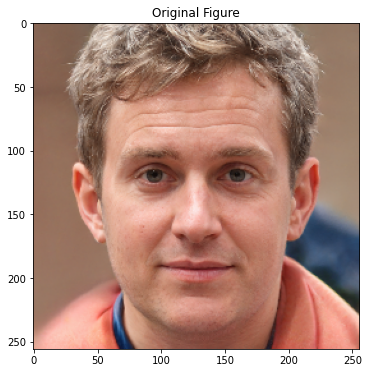

In [10]:
img = Image.open(r'/content/drive/MyDrive/Datasets/data256/train/train_512679569082.png')
img_arr = np.asarray(img)
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(img_arr)
ax.set_title('Original Figure')

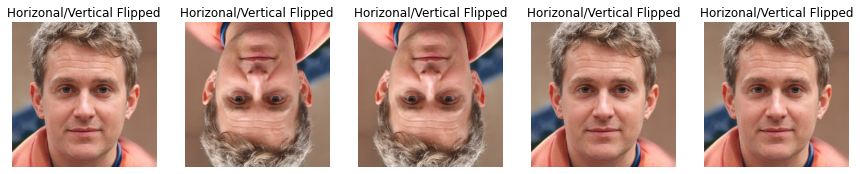

In [13]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            horizontal_flip = True,
            vertical_flip = True,
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img_arr,axis=0), batch_size=1)

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Horizonal/Vertical Flipped')

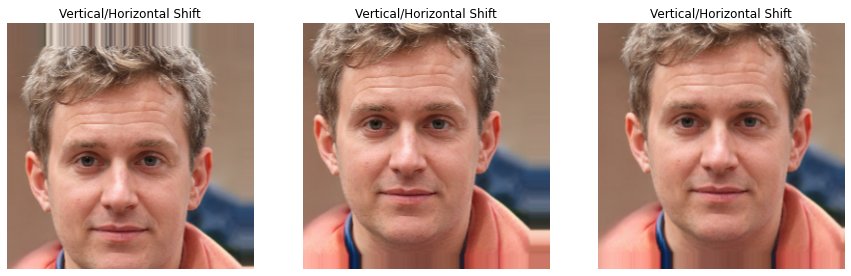

In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            width_shift_range=0.1, 
            height_shift_range=0.1,
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img_arr,axis=0), batch_size=1)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
# generate batch of images
for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Vertical/Horizontal Shift')

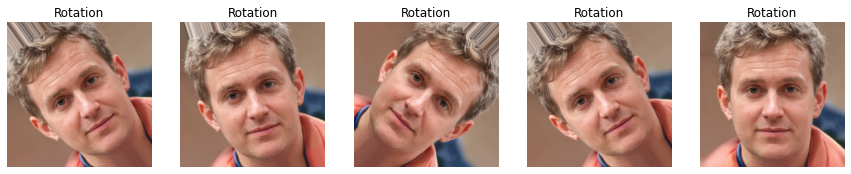

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rotation_range = 45,
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img_arr,axis=0), batch_size=1)

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Rotation')

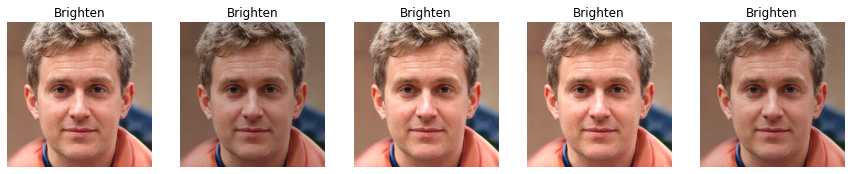

In [16]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            brightness_range = [0.8,1.1],
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img_arr,axis=0), batch_size=1)

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Brighten')

Tìm độ sáng phù hợp cho các bức hình tối

Text(0.5, 1.0, 'Original Figure')

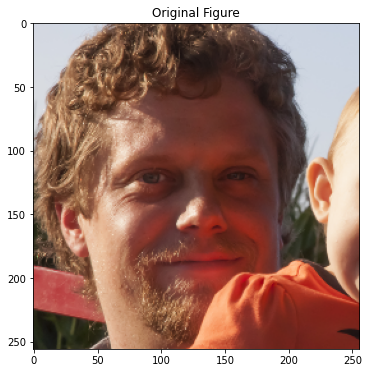

In [17]:
img2 = Image.open(r'/content/drive/MyDrive/Datasets/data256/train/train_2849758460990.png')
img2_arr = np.asarray(img2)
fig,ax = plt.subplots(figsize=(6,6))
ax.imshow(img2_arr)
ax.set_title('Original Figure')

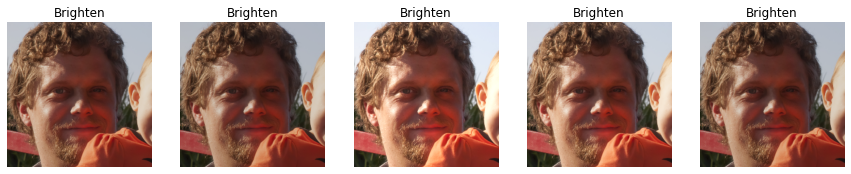

In [18]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            brightness_range = [0.8,1.1],
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img2_arr,axis=0), batch_size=1)

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Brighten')

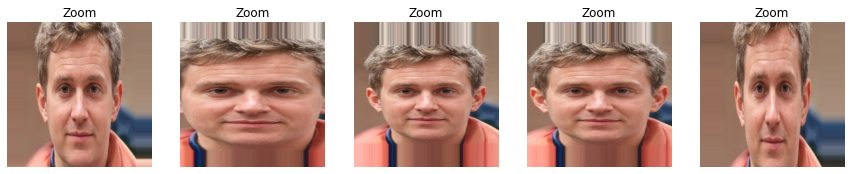

In [19]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            zoom_range = [0.5,1.5],
            fill_mode = 'nearest')
aug_iter = datagen.flow(np.expand_dims(img_arr,axis=0), batch_size=1)

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(15,15))
# generate batch of images
for i in range(5):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    ax[i].set_title('Zoom')